# k-means Clustering of Movie Ratings

Donghai Xu 

## Dataset overview
The dataset has two files. We'll import them both into pandas dataframes:

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

# Import the Movies dataset
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# Import the ratings dataset
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205



## Romance vs. Scifi
We start by taking a subset of users, and seeing what their preferred genres are. 

In [0]:
# Calculate the average rating of romance and scifi movies

genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [0]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


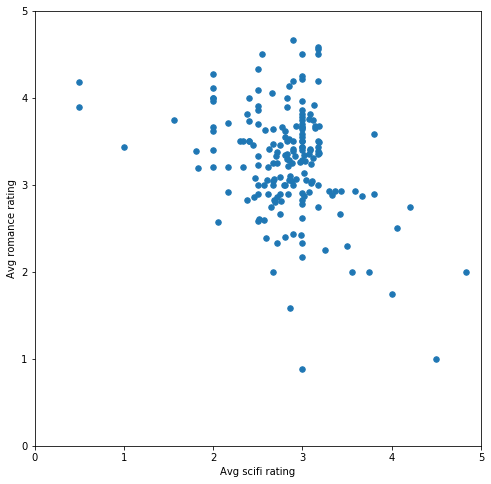

In [0]:
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [0]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

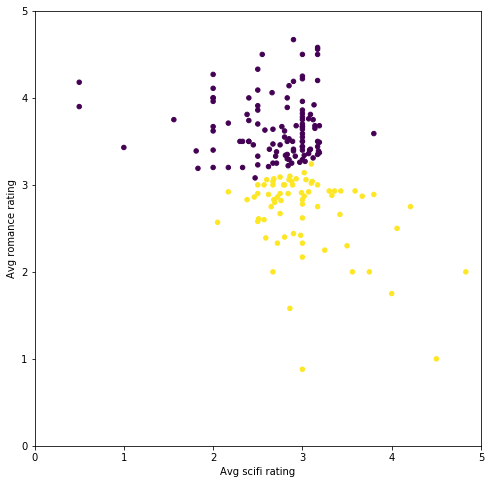

In [0]:
# Import KMeans
from sklearn.cluster import KMeans

# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2, random_state=0).fit(X)

# use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions)

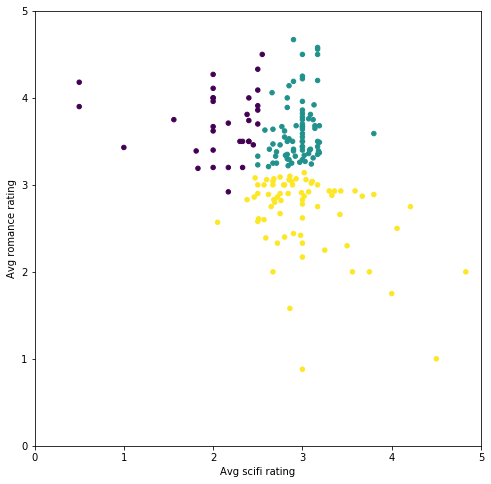

In [0]:

# Create an instance of KMeans to find three clusters
kmeans_2 =KMeans(n_clusters=3).fit(X)


# use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

Now the average scifi rating is starting to come into play. The groups are:
 * people who like romance but not scifi
 * people who like scifi but not romance
 * people who like both scifi and romance
 


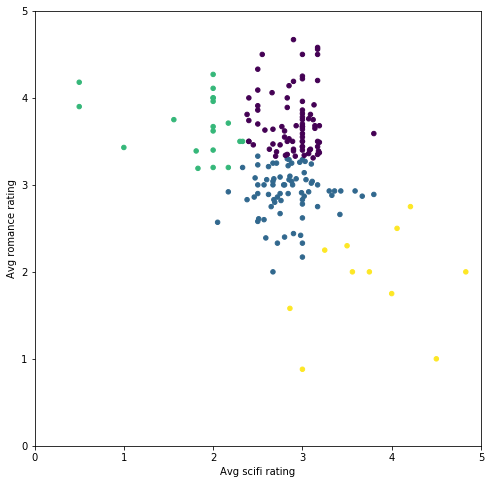

In [0]:
# Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters=4).fit(X)

# use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

In [0]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [0]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values

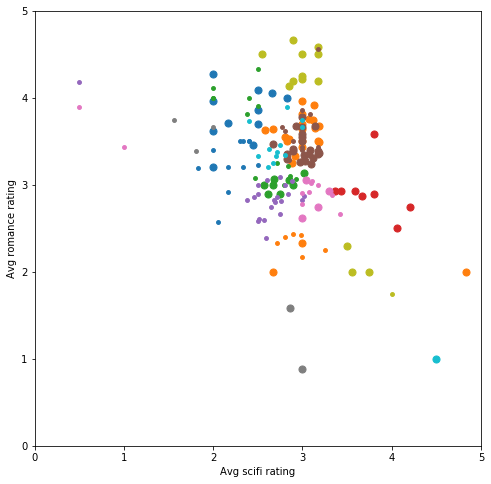

In [0]:
# Create an instance of KMeans to find seven clusters
kmeans_5 =  KMeans(n_clusters=22).fit(X)

# use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [0]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

To visualize some of these clusters, we'll plot each cluster as a heat map:

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 12
# of users in cluster: 239. # of users in plot: 70


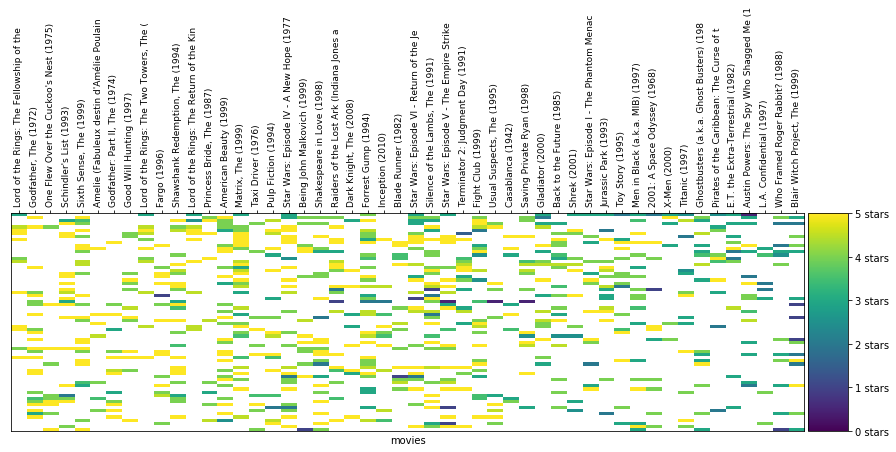

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 6
# of users in cluster: 35. # of users in plot: 35


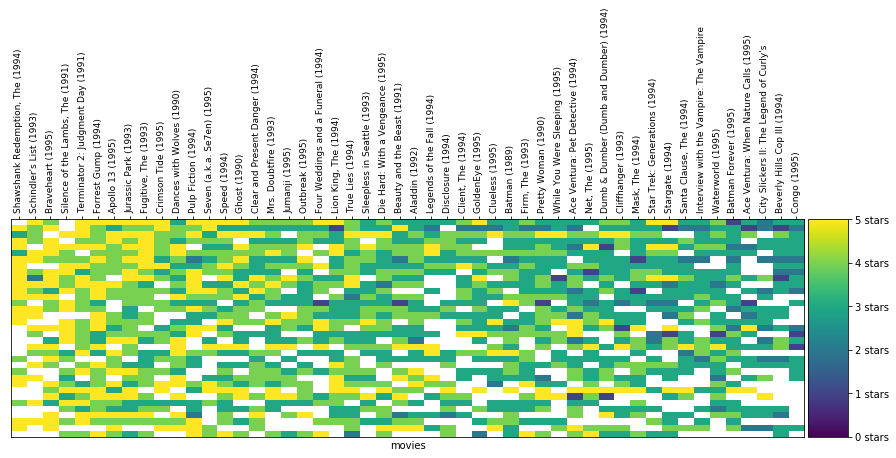

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 11
# of users in cluster: 55. # of users in plot: 55


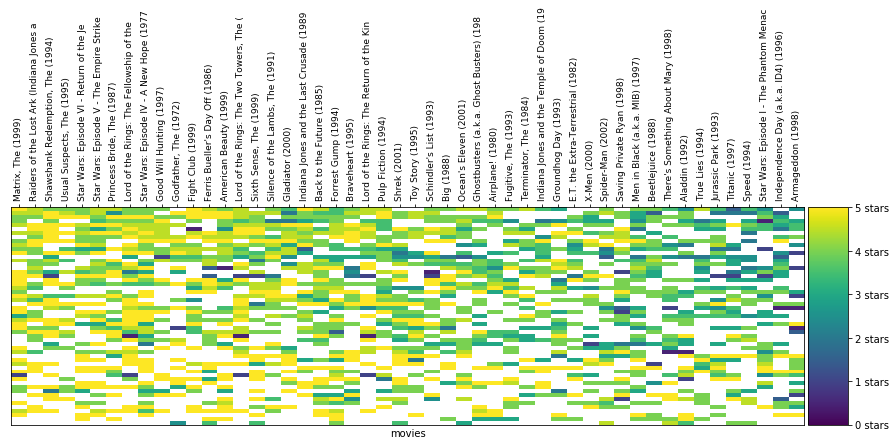

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 13
# of users in cluster: 60. # of users in plot: 60


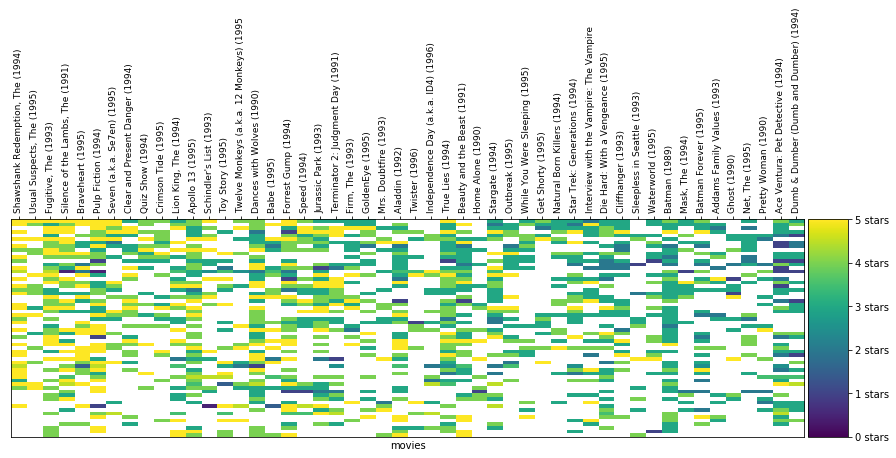

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 9
# of users in cluster: 62. # of users in plot: 62


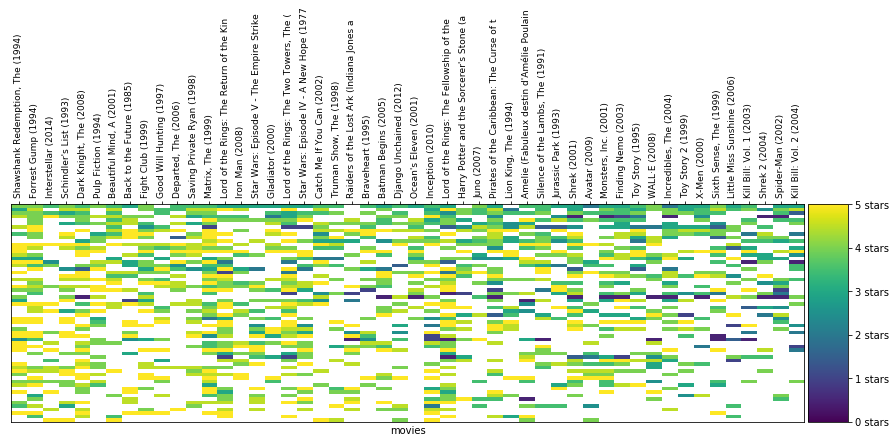

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).so

cluster # 14
# of users in cluster: 71. # of users in plot: 70


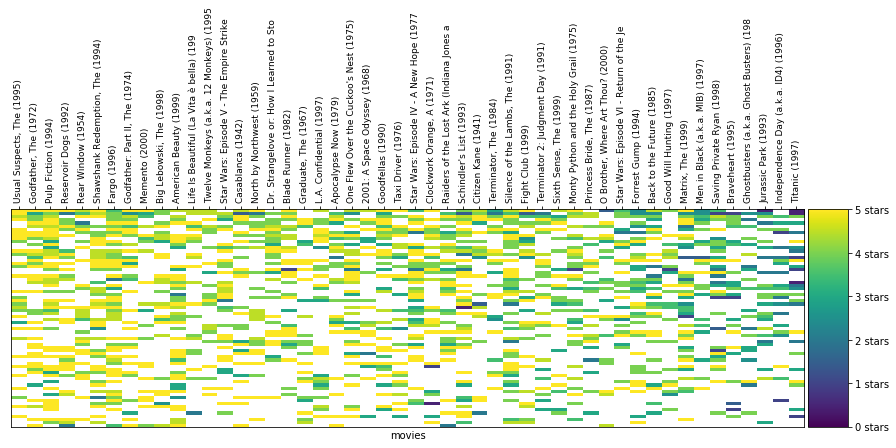

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 1
# of users in cluster: 36. # of users in plot: 36


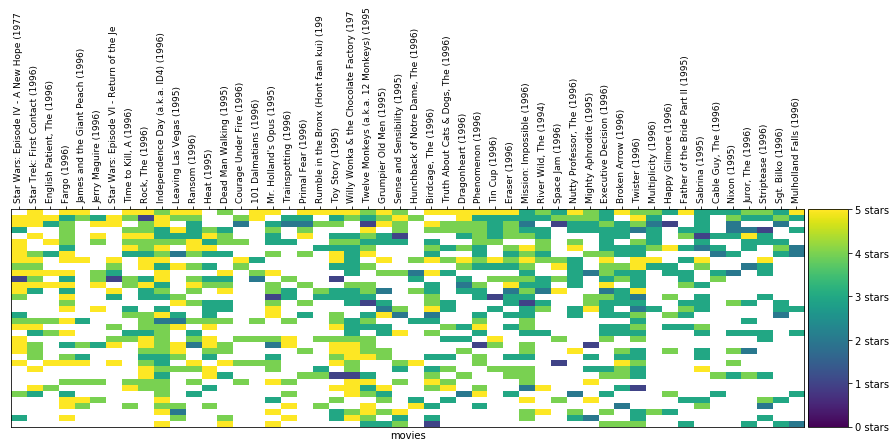

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 2
# of users in cluster: 14. # of users in plot: 14


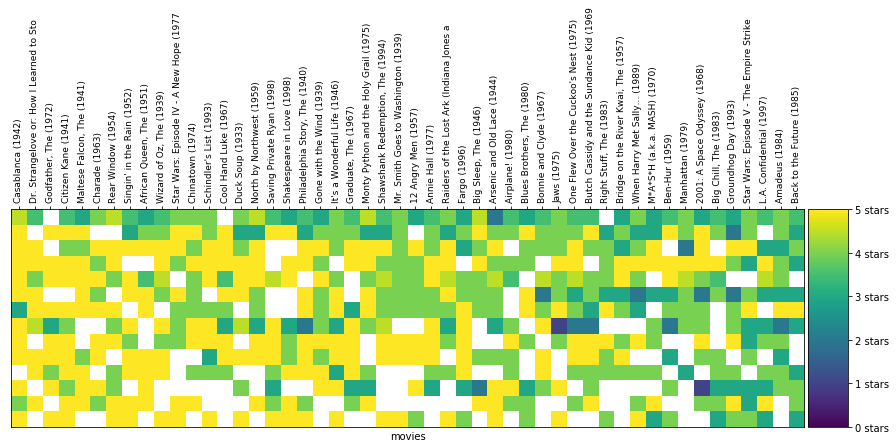

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 4
# of users in cluster: 15. # of users in plot: 15


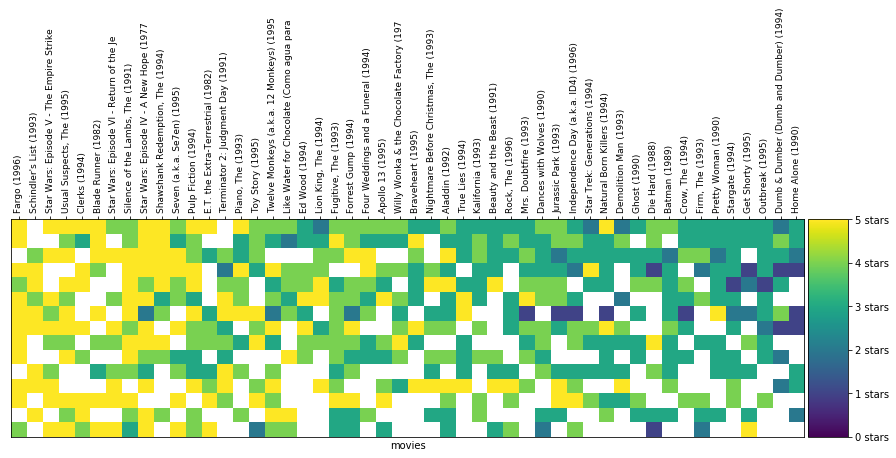

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).so

cluster # 0
# of users in cluster: 19. # of users in plot: 19


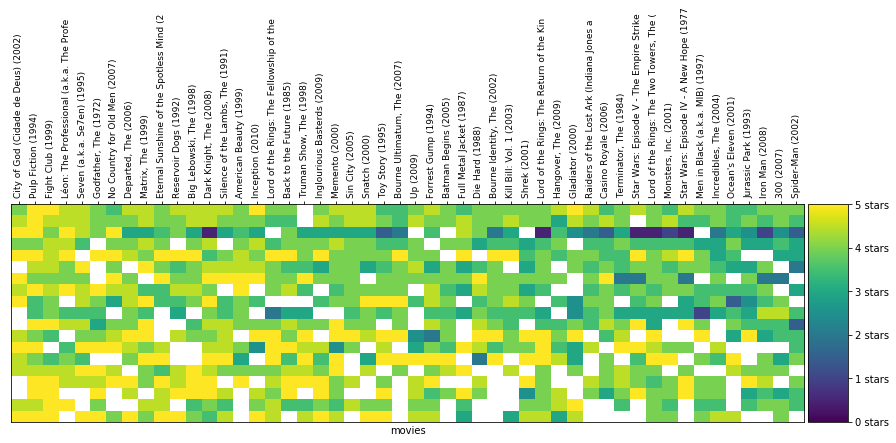

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).so

cluster # 10
# of users in cluster: 17. # of users in plot: 17


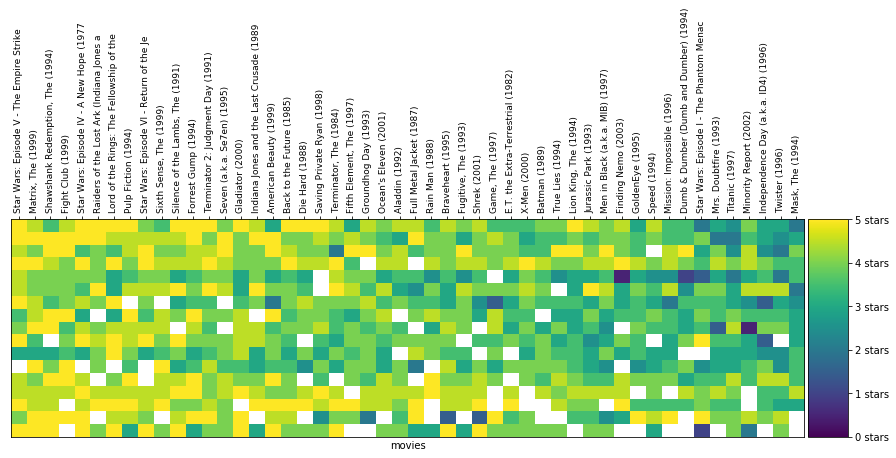

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 8
# of users in cluster: 13. # of users in plot: 13


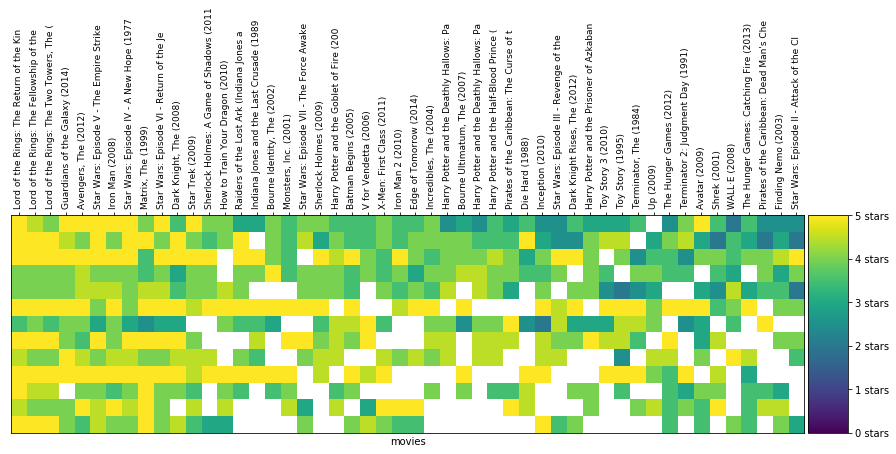

C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:115: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Arpit Nimawat\K-means CLustering of Movies Ratings\helper.py:116: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).so

In [0]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

In [0]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Fargo (1996)                                                                      4.448980
Pulp Fiction (1994)                                                               4.542553
American Beauty (1999)                                                            4.377778
Silence of the Lambs, The (1991)                                                  4.113636
Shawshank Redemption, The (1994)                                                  4.464286
Matrix, The (1999)                                                                3.794872
Schindler's List (1993)                                                           4.141026
Star Wars: Episode IV - A New Hope (1977)                                         4.197368
Godfather, The (1972)                                                             4.592105
One Flew Over the Cuckoo's Nest (1975)                                            4.250000
Forrest Gump (1994)                                                               3.914286

In [0]:
# Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 29

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

Wallace & Gromit: A Close Shave (1995)             4.791667
African Queen, The (1951)                          4.750000
Remains of the Day, The (1993)                     4.714286
Cinema Paradiso (Nuovo cinema Paradiso) (1989)     4.700000
Rushmore (1998)                                    4.666667
Usual Suspects, The (1995)                         4.661290
Election (1999)                                    4.642857
Roger & Me (1989)                                  4.636364
Seven Samurai (Shichinin no samurai) (1954)        4.633333
Godfather, The (1972)                              4.592105
Cool Hand Luke (1967)                              4.583333
Postman, The (Postino, Il) (1994)                  4.571429
Wallace & Gromit: The Wrong Trousers (1993)        4.562500
Grand Day Out with Wallace and Gromit, A (1989)    4.555556
Boot, Das (Boat, The) (1981)                       4.545455
City of God (Cidade de Deus) (2002)                4.541667
Vertigo (1958)                          

# heirarical cluster


In [0]:
from sklearn import datasets, cluster

X = datasets.load_iris().data[:10]

clust = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')

labels = clust.fit_predict(X)

In [0]:
print(labels)

[1 0 0 0 1 2 0 1 0 0]


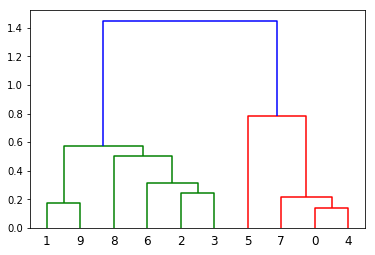

In [0]:
from scipy.cluster.hierarchy import dendrogram, ward, single
from sklearn import datasets
import matplotlib.pyplot as plt


X = datasets.load_iris().data[:10]

linkage_matrix = ward(X)

dendrogram(linkage_matrix)

plt.show()